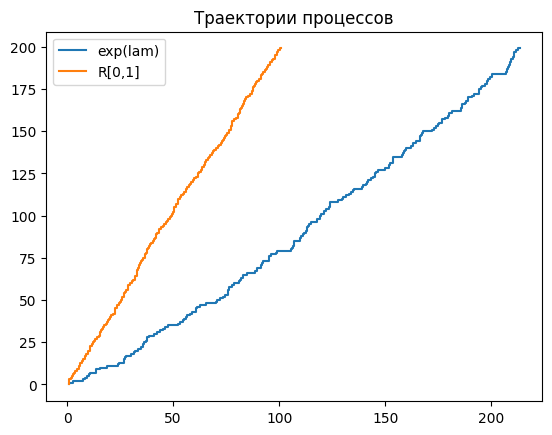

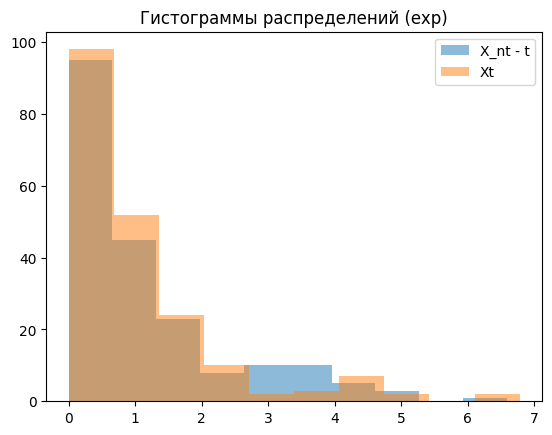

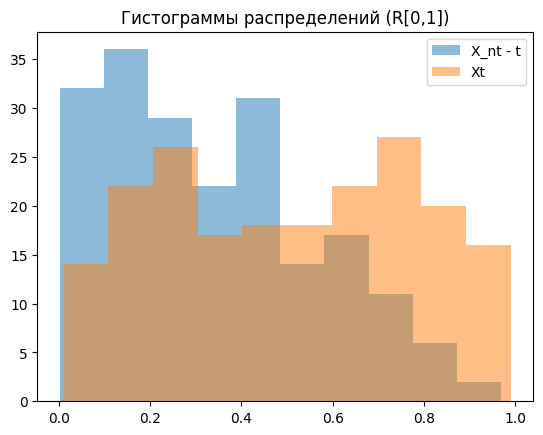

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import linalg
import statistics as st
import pandas as pd

#1#
n = 200
lamb = 1
time_exp = []
time_unif = []
S = []
T1 = []
T2 = []
time_exp = np.random.exponential(1/lamb, n)
time_unif = np.random.uniform(0, 1, n)
for i in range(n):
  S.append(i)
  T1.append(time_exp[i])
  T2.append(time_unif[i])

for i in range(1, n):
  time_exp[i]+=time_exp[i-1]
  time_unif[i]+=time_unif[i-1]

plt.title("Траектории процессов")
plt.step(time_exp, S)
plt.step(time_unif, S)
plt.legend(('exp(lam)','R[0,1]'))
plt.show()

X1 = np.random.uniform(0, max(time_exp), n)
X2 = np.random.uniform(0, max(time_unif), n)
#print(X1)
#print(T1)
for i in range(n):
  for j in range(1, n):
    if time_exp[j-1]<=X1[i] and time_exp[j]>X1[i]:
      X1[i]=time_exp[j]-X1[i]

for i in range(n):
  for j in range(1, n):
    if time_unif[j-1]<=X2[i] and time_unif[j]>X2[i]:
      X2[i]=time_unif[j]-X2[i]

#print(X1)
plt.title("Гистограммы распределений (exp)")
plt.hist(X1, alpha = 0.5)
plt.hist(T1, alpha =0.5)
plt.legend(('X_nt - t','Xt'))
plt.show()

plt.title("Гистограммы распределений (R[0,1])")
plt.hist(X2, alpha = 0.5)
plt.hist(T2, alpha =0.5)
plt.legend(('X_nt - t','Xt'))



In [ ]:
#2#
import numpy as np
rng = np.random.default_rng()
n = 1100
m = 1000
lamb = 2
St1 = [] #exp(2)
St2 = [] #gamma(2, 1/4)
St3 = [] #R[0, 1]

for j in range(m):
  time_exp = np.random.exponential(1/lamb, n)
  for i in range(1, n):
    time_exp[i]+=time_exp[i-1]
  for i in range(1, len(time_exp)):
    if time_exp[i-1] <=100 and time_exp[i]>100:
      St1.append(time_exp[i]-time_exp[i-1])
      break


for j in range(m):
  time_gamma = rng.gamma(2, scale=1/4, size=n)
  for i in range(1, n):
    time_gamma[i]+=time_gamma[i-1]
  for i in range(1, len(time_gamma)):
    if time_gamma[i-1] <=100 and time_gamma[i]>100:
      St2.append(time_gamma[i]-time_gamma[i-1])
      break

for j in range(m):
  time_unif = np.random.uniform(0, 1, n)
  for i in range(1, n):
    time_unif[i]+=time_unif[i-1]
  for i in range(1, len(time_exp)):
    if time_unif[i-1] <=100 and time_unif[i]>100:
      St3.append(time_unif[i]-time_unif[i-1])
      break

print("a) exp(2)")#exp(2)
print("Численная средняя длина: ", np.mean(St1))
print("Теоретическая средняя длина: ", 2*1/lamb)
print("b) gamma(2, 1/4)")#gamma(2, 1/4)
print("Численная средняя длина: ", np.mean(St2))
print("Теоретическая средняя длина: ", 4*1/4 )
print("c) R[0,1]")#R[0,1]
print("Численная средняя длина: ", np.mean(St3))
print("Теоретическая средняя длина: ", 1.0)

a) exp(2)
Численная средняя длина:  0.9905306657270841
Теоретическая средняя длина:  1.0
b) gamma(2, 1/4)
Численная средняя длина:  0.747739310481082
Теоретическая средняя длина:  1.0
c) R[0,1]
Численная средняя длина:  0.6788482817843111
Теоретическая средняя длина:  1.0


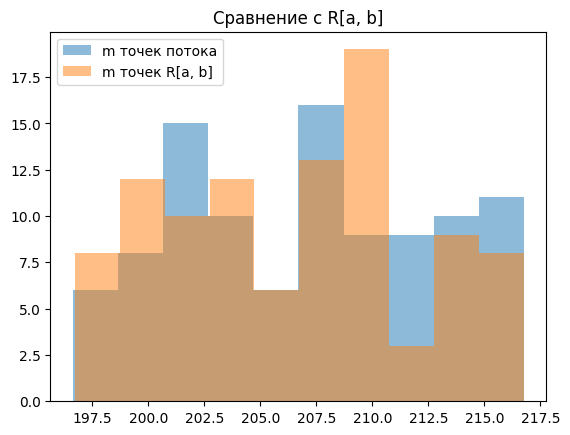

In [ ]:
#3#
n = 10000
m = 100
lamb = 5
S = []
time_exp = np.random.exponential(1/lamb, n)
for i in range(n):
  time_exp[i]+=time_exp[i-1]
  S.append(i)

k = np.random.randint(0, m-1)
Nt = []
for i in range(m):
  Nt.append(time_exp[k*m+i-1])
X = np.random.uniform(min(Nt), max(Nt), m)
plt.title("Сравнение с R[a, b]")
plt.hist(Nt, alpha = 0.5)
plt.hist(X,  alpha = 0.5)
plt.legend(('m точек потока','m точек R[a, b]'))
plt.show()


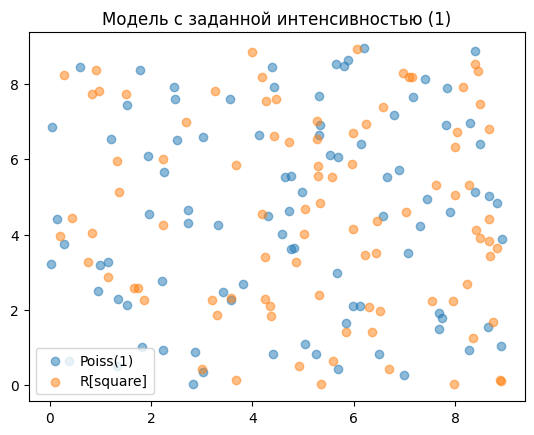

[10, 11, 9, 9, 9, 11, 9, 13, 10]
[4, 13, 12, 8, 12, 13, 6, 10, 13]
Значение критерия однородности:  34.5 0.6224991003041149


In [ ]:
#3б#
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import linalg
import statistics as st
import pandas as pd

n = 150

xMin=0
xMax=9
yMin=0
yMax=9
xDelta=xMax-xMin
yDelta=yMax-yMin
areaTotal=xDelta*yDelta

lamb=1

numbPoints = ss.poisson( lamb*areaTotal ).rvs()
xx = xDelta*ss.uniform.rvs(0,1,((numbPoints,1)))+xMin
yy = yDelta*ss.uniform.rvs(0,1,((numbPoints,1)))+yMin

plt.title("Модель с заданной интенсивностью (1)")
plt.scatter(xx, yy, alpha=0.5)

X = np.random.uniform(xMin, xMax, size = len(xx))
Y = np.random.uniform(xMin, yMax, size = len(xx))
plt.scatter(X, Y, alpha=0.5)
plt.legend(('Poiss(1)', 'R[square]'))
plt.show()

def count_2d(X1, Y1, xmin, xmax):
  k = 3
  temp = [0]*3
  for i in range(3):
    temp[i] = [0] * 3
  nu = [[],[],[]]
  for z in range(len(X1)):
    for i in range(k):
      if (X1[z] > i*(xmax - xmin)/k and X1[z] <= (i+1)*(xmax - xmin)/k):
        nu[i].append(z)
  for i in range(k):
    for z in range(k):
      for j in range(len(nu[i])):
        if (Y1[nu[i][j]] > z*(xmax - xmin)/k and Y1[nu[i][j]] <= (z+1)*(xmax - xmin)/k):
          temp[z][i]+=1
  return temp

Buf_poiss = count_2d(xx, yy, xMin, xMax)
Buf_unif = count_2d(X, Y, xMin, xMax)

Count_poiss = []
Count_unif = []

for i in range(3):
  for j in range(3):
      Count_poiss.append(Buf_poiss[i][j])
      Count_unif.append(Buf_unif[i][j])

print(Count_poiss)
print(Count_unif)
print("Значение критерия однородности: ", ss.mannwhitneyu(Count_poiss, Count_unif).statistic, ss.mannwhitneyu(Count_poiss, Count_unif).pvalue)

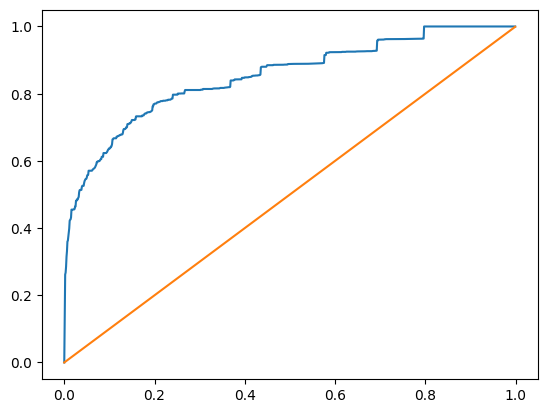

In [ ]:
#def p_v(n, xMax, xMin, yMax, yMin):

  xDelta=xMax-xMin
  yDelta=yMax-yMin
  areaTotal=xDelta*yDelta
  lamb=1
  numbPoints = ss.poisson( lamb*areaTotal ).rvs()
  xx = xDelta*ss.uniform.rvs(0, 1,((numbPoints,1)))+xMin
  yy = yDelta*ss.uniform.rvs(0, 1,((numbPoints,1)))+yMin

  X = np.random.uniform(xMin, xMax, size = len(xx))
  Y = np.random.uniform(xMin, yMax, size = len(xx))
  Buf_unif = count_2d(X, Y, xMin, xMax)
  X = np.random.uniform(xMin, xMax, size = len(xx))
  Y = np.random.uniform(xMin, yMax, size = len(xx))

  Buf_poiss = count_2d(xx, yy, xMin, xMax)

  Count_poiss = []
  Count_unif = []

  for i in range(3):
    for j in range(3):
      Count_poiss.append(Buf_poiss[i][j])
      Count_unif.append(Buf_unif[i][j])

  return ss.kruskal(Count_poiss, Count_unif).pvalue

n = 150
m = 1000
p = []
p.append(0)
for i in range(m):
  p.append(p_v(n, 3, 0, 3, 0))
p = np.sort(p)
ax = np.arange(0, 1, 1/len(p))
plt.plot(ax, p)
plt.plot(ax, ax)


Количество точек (1):  132
95% доверительный интервал (1): ( 138.33159452614595 , 142.12173880718737 )


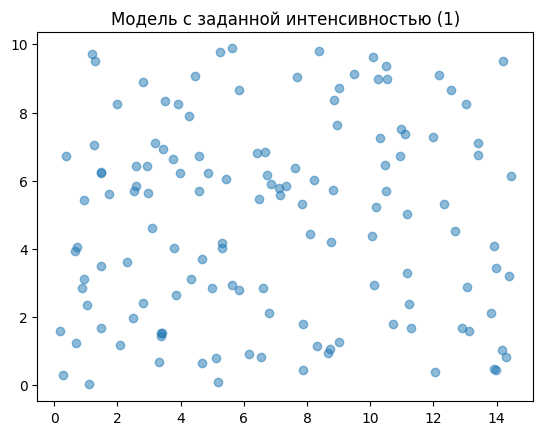

Количество точек (2):  132
95% доверительный интервал (2): ( 120.24561084128632 , 123.78105582538035 )


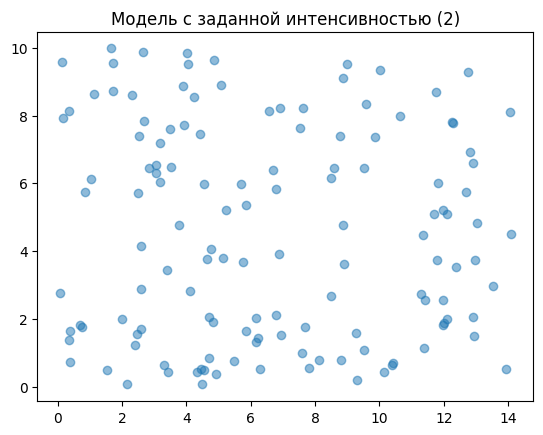

In [ ]:
#4#
n = 150

xMin=0
xMax=14.5
yMin=0
yMax=10
xDelta=xMax-xMin
yDelta=yMax-yMin
areaTotal=xDelta*yDelta

lamb=24/25

numbPoints = ss.poisson( lamb*areaTotal ).rvs()
xx = xDelta*ss.uniform.rvs(0,1,((numbPoints,1)))+xMin
yy = yDelta*ss.uniform.rvs(0,1,((numbPoints,1)))+yMin

plt.title("Модель с заданной интенсивностью (1)")
plt.scatter(xx, yy, alpha=0.5)

print("Количество точек (1): ",numbPoints)
X1 = ss.poisson.rvs( lamb*areaTotal, size = n )
print("95% доверительный интервал (1): (", np.mean(X1) - 1.96*math.sqrt(np.mean(X1)/(n)), ",", np.mean(X1) + 1.96*math.sqrt(np.mean(X1)/n), ")")
plt.show()


lamb=21/25

numbPoints = ss.poisson( lamb*areaTotal ).rvs()
xx = xDelta*ss.uniform.rvs(0,1,((numbPoints,1)))+xMin
yy = yDelta*ss.uniform.rvs(0,1,((numbPoints,1)))+yMin

plt.title("Модель с заданной интенсивностью (2)")
plt.scatter(xx, yy, alpha=0.5)

print("Количество точек (2): ",numbPoints)
X1 = ss.poisson.rvs( lamb*areaTotal, size = n )
print("95% доверительный интервал (2): (", np.mean(X1) - 1.96*math.sqrt(np.mean(X1)/(n)), ",", np.mean(X1) + 1.96*math.sqrt(np.mean(X1)/n), ")")

In [ ]:
#5#
import scipy.stats as ss
import math

#X1+ .... +Xn - poiss(lamb)
#Y2+ .... +Yn - poiss(lamb)

X = [1, 3, 5, 5, 4, 1, 1, 3, 2]
Y = [3, 3, 4, 2, 3, 0, 3, 2, 2]

print(ss.mannwhitneyu(X, Y).statistic, ss.mannwhitneyu(X, Y).pvalue)

44.0 0.7854947471183542
